In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Explore data

In [2]:
df = pd.read_csv('D:\PYTHON\Project CV\Churn_Modelling.csv')

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6862,6863,15736287,Piccio,586,France,Male,33,9,0.00,1,1,0,6975.02,0
2652,2653,15761348,Kuo,601,France,Female,38,0,0.00,2,1,0,165196.65,0
3713,3714,15657937,Lord,709,Germany,Male,22,0,112949.71,1,0,0,155231.55,0
5859,5860,15652914,Ibrahimov,721,Spain,Male,38,7,0.00,1,0,1,53534.80,0
8105,8106,15635116,Burgos,659,Spain,Male,60,2,0.00,1,1,0,177480.45,1


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


* có 1 nghìn dòng dữ liệu
* credit score có giá trị từ 350 đến 850
* Độ tuổi từ 18 đến 92, trung bình là 39 tuổi, 75% số người dưới 44 tuổi
* Tenere: số năm một người trở thành khách hàng của ngân hàng
* Balance: số dư trong tài khoản
* HasCrCard: có hay không có thẻ tín dụng
* EstimatedSalary: thu nhập ước tính của khách hàng
* Exited: Khách hàng đã rời bỏ sử dụng dịch vụ hay chưa

In [6]:
for col in df.columns:
    print(col, ':', len(df[col].value_counts()))

RowNumber : 10000
CustomerId : 10000
Surname : 2932
CreditScore : 460
Geography : 3
Gender : 2
Age : 70
Tenure : 11
Balance : 6382
NumOfProducts : 4
HasCrCard : 2
IsActiveMember : 2
EstimatedSalary : 9999
Exited : 2


## 2. Explore variables

**Age**

In [7]:
age_df = df.groupby(['Age','Exited']).agg('count')
age_df

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  \
Age Exited                                                                   
18  0              20          20       20           20         20      20   
    1               2           2        2            2          2       2   
19  0              26          26       26           26         26      26   
    1               1           1        1            1          1       1   
20  0              38          38       38           38         38      38   
...               ...         ...      ...          ...        ...     ...   
84  0               1           1        1            1          1       1   
    1               1           1        1            1          1       1   
85  0               1           1        1            1          1       1   
88  0               1           1        1            1          1       1   
92  0               2           2        2            2          2       2   

            Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
Age Exited                                                              
18  0           20       20             20         20              20   
    1            2        2              2          2               2   
19  0           26       26             26         26              26   
    1            1        1              1          1               1   
20  0           38       38             38         38              38   
...            ...      ...            ...        ...             ...   
84  0            1        1              1          1               1   
    1            1        1              1          1               1   
85  0            1        1              1          1               1   
88  0            1        1              1          1               1   
92  0            2        2              2          2               2   

            EstimatedSalary  
Age Exited                   
18  0                    20  
    1                     2  
19  0                    26  
    1                     1  
20  0                    38  
...                     ...  
84  0                     1  
    1                     1  
85  0                     1  
88  0                     1  
92  0                     2  

[128 rows x 12 columns]

In [8]:
age_df.reset_index(drop = False, inplace = True)
age_df

,Age,Exited,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,18,0,20,20,20,20,20,20,20,20,20,20,20,20
1,18,1,2,2,2,2,2,2,2,2,2,2,2,2
2,19,0,26,26,26,26,26,26,26,26,26,26,26,26
3,19,1,1,1,1,1,1,1,1,1,1,1,1,1
4,20,0,38,38,38,38,38,38,38,38,38,38,38,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,84,0,1,1,1,1,1,1,1,1,1,1,1,1
124,84,1,1,1,1,1,1,1,1,1,1,1,1,1
125,85,0,1,1,1,1,1,1,1,1,1,1,1,1
126,88,0,1,1,1,1,1,1,1,1,1,1,1,1


In [9]:
age_df_inexit= age_df[age_df['Exited'] == 0][['Age', 'CreditScore']]
age_df_inexit

,Age,CreditScore
0,18,20
2,19,26
4,20,38
6,21,50
8,22,72
...,...,...
122,83,1
123,84,1
125,85,1
126,88,1


In [10]:
age_df_inexit = age_df_inexit.rename(columns = {'CreditScore': 'Count_Inexit'})
age_df_inexit

,Age,Count_Inexit
0,18,20
2,19,26
4,20,38
6,21,50
8,22,72
...,...,...
122,83,1
123,84,1
125,85,1
126,88,1


In [11]:
age_df_exit= age_df[age_df['Exited'] == 1][['Age', 'CreditScore']]
age_df_exit = age_df_exit.rename(columns = {'CreditScore': 'Count_Exit'})
age_df_exit

,Age,Count_Exit
1,18,2
3,19,1
5,20,2
7,21,3
9,22,12
11,23,6
13,24,14
15,25,6
17,26,14
19,27,13


In [12]:
age_vs_exited = pd.merge(age_df_exit, age_df_inexit, how= 'outer', left_on='Age', right_on= 'Age')

In [13]:
age_vs_exited

,Age,Count_Exit,Count_Inexit
0,18,2.0,20
1,19,1.0,26
2,20,2.0,38
3,21,3.0,50
4,22,12.0,72
...,...,...,...
65,82,NaN,1
66,83,NaN,1
67,85,NaN,1
68,88,NaN,1


In [14]:
age_vs_exited['ratio'] = age_vs_exited.fillna(0, inplace=True)
age_vs_exited

,Age,Count_Exit,Count_Inexit,ratio
0,18,2.0,20,None
1,19,1.0,26,None
2,20,2.0,38,None
3,21,3.0,50,None
4,22,12.0,72,None
...,...,...,...,...
65,82,0.0,1,None
66,83,0.0,1,None
67,85,0.0,1,None
68,88,0.0,1,None


In [15]:
age_vs_exited['ratio']= age_vs_exited['Count_Exit']*100/(age_vs_exited['Count_Exit']+ age_vs_exited['Count_Inexit'])

In [16]:
age_vs_exited

,Age,Count_Exit,Count_Inexit,ratio
0,18,2.0,20,9.090909
1,19,1.0,26,3.703704
2,20,2.0,38,5.000000
3,21,3.0,50,5.660377
4,22,12.0,72,14.285714
...,...,...,...,...
65,82,0.0,1,0.000000
66,83,0.0,1,0.000000
67,85,0.0,1,0.000000
68,88,0.0,1,0.000000


<AxesSubplot:xlabel='Age', ylabel='ratio'>

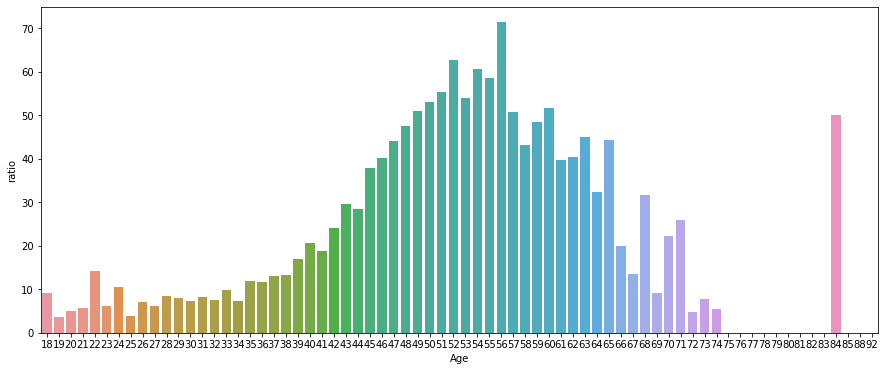

In [17]:
fig, ax = plt.subplots(figsize = [15,6])
sns.barplot(data = age_vs_exited, x = 'Age', y = 'ratio')


* Nhận xét: Tỉ lệ người dùng rời bỏ cao nhất là ở độ tuổi 56, khoảng từ 45-65
* Độ tuổi 84 cũng có tỉ lệ rời bỏ đột nhiên tăng vọt


In [18]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [19]:
len(df[(df['Geography'] == 'Germany') & (df['Age']>=45) & (df['Age']<=65)])

624

In [20]:
def ratio_nation(nation):
    return len(df[(df['Geography'] == nation) & (df['Age']>=45) & (df['Age']<=65)])\
        / len(df[df['Geography'] == nation])

In [21]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [22]:
for i in df['Geography'].unique():
    print(f'{i}: {ratio_nation(i):.2f}')

France: 0.19
Spain: 0.20
Germany: 0.25


Đức là nước có tỉ trọng nhóm người thuộc nhóm tuổi rời bỏ (45-65) cao nhất

**Tenure**

In [23]:
df_ten_exit = df[df['Exited'] == 1].groupby('Tenure').agg('count')
df_ten_exit

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Tenure,,,,,,,,,,,,,
0,95,95,95,95,95,95,95,95,95,95,95,95,95
1,232,232,232,232,232,232,232,232,232,232,232,232,232
2,201,201,201,201,201,201,201,201,201,201,201,201,201
3,213,213,213,213,213,213,213,213,213,213,213,213,213
4,203,203,203,203,203,203,203,203,203,203,203,203,203
5,209,209,209,209,209,209,209,209,209,209,209,209,209
6,196,196,196,196,196,196,196,196,196,196,196,196,196
7,177,177,177,177,177,177,177,177,177,177,177,177,177
8,197,197,197,197,197,197,197,197,197,197,197,197,197


In [24]:
df_ten_exit.reset_index(drop=False, inplace = True)
df_ten_exit

,Tenure,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,95,95,95,95,95,95,95,95,95,95,95,95,95
1,1,232,232,232,232,232,232,232,232,232,232,232,232,232
2,2,201,201,201,201,201,201,201,201,201,201,201,201,201
3,3,213,213,213,213,213,213,213,213,213,213,213,213,213
4,4,203,203,203,203,203,203,203,203,203,203,203,203,203
5,5,209,209,209,209,209,209,209,209,209,209,209,209,209
6,6,196,196,196,196,196,196,196,196,196,196,196,196,196
7,7,177,177,177,177,177,177,177,177,177,177,177,177,177
8,8,197,197,197,197,197,197,197,197,197,197,197,197,197
9,9,213,213,213,213,213,213,213,213,213,213,213,213,213


In [25]:
df_ten_exit = df_ten_exit[['Tenure', 'CreditScore']]
df_ten_exit

,Tenure,CreditScore
0,0,95
1,1,232
2,2,201
3,3,213
4,4,203
5,5,209
6,6,196
7,7,177
8,8,197
9,9,213


In [26]:
df_ten_exit = df_ten_exit.rename(columns = {'CreditScore': 'Count_exit'})
df_ten_exit

,Tenure,Count_exit
0,0,95
1,1,232
2,2,201
3,3,213
4,4,203
5,5,209
6,6,196
7,7,177
8,8,197
9,9,213


In [27]:
df_ten_inexit = df[df['Exited'] == 0].groupby('Tenure').agg('count')
df_ten_inexit

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Tenure,,,,,,,,,,,,,
0,318,318,318,318,318,318,318,318,318,318,318,318,318
1,803,803,803,803,803,803,803,803,803,803,803,803,803
2,847,847,847,847,847,847,847,847,847,847,847,847,847
3,796,796,796,796,796,796,796,796,796,796,796,796,796
4,786,786,786,786,786,786,786,786,786,786,786,786,786
5,803,803,803,803,803,803,803,803,803,803,803,803,803
6,771,771,771,771,771,771,771,771,771,771,771,771,771
7,851,851,851,851,851,851,851,851,851,851,851,851,851
8,828,828,828,828,828,828,828,828,828,828,828,828,828


In [28]:
df_ten_inexit.reset_index(drop=False, inplace = True)
df_ten_inexit

,Tenure,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,318,318,318,318,318,318,318,318,318,318,318,318,318
1,1,803,803,803,803,803,803,803,803,803,803,803,803,803
2,2,847,847,847,847,847,847,847,847,847,847,847,847,847
3,3,796,796,796,796,796,796,796,796,796,796,796,796,796
4,4,786,786,786,786,786,786,786,786,786,786,786,786,786
5,5,803,803,803,803,803,803,803,803,803,803,803,803,803
6,6,771,771,771,771,771,771,771,771,771,771,771,771,771
7,7,851,851,851,851,851,851,851,851,851,851,851,851,851
8,8,828,828,828,828,828,828,828,828,828,828,828,828,828
9,9,771,771,771,771,771,771,771,771,771,771,771,771,771


In [29]:
df_ten_inexit = df_ten_inexit[['Tenure', 'CreditScore']]
df_ten_inexit

,Tenure,CreditScore
0,0,318
1,1,803
2,2,847
3,3,796
4,4,786
5,5,803
6,6,771
7,7,851
8,8,828
9,9,771


In [30]:
df_ten_inexit = df_ten_inexit.rename(columns = {'CreditScore': 'Count_inexit'})
df_ten_inexit

,Tenure,Count_inexit
0,0,318
1,1,803
2,2,847
3,3,796
4,4,786
5,5,803
6,6,771
7,7,851
8,8,828
9,9,771


In [31]:
df_ten = pd.merge(df_ten_exit, df_ten_inexit, how = 'outer', on = 'Tenure')

In [32]:
df_ten

,Tenure,Count_exit,Count_inexit
0,0,95,318
1,1,232,803
2,2,201,847
3,3,213,796
4,4,203,786
5,5,209,803
6,6,196,771
7,7,177,851
8,8,197,828
9,9,213,771


In [33]:
df_ten['Ratio']= df_ten['Count_exit']/(df_ten['Count_exit'] + df_ten['Count_inexit'])
df_ten

,Tenure,Count_exit,Count_inexit,Ratio
0,0,95,318,0.230024
1,1,232,803,0.224155
2,2,201,847,0.191794
3,3,213,796,0.211100
4,4,203,786,0.205258
5,5,209,803,0.206522
6,6,196,771,0.202689
7,7,177,851,0.172179
8,8,197,828,0.192195
9,9,213,771,0.216463


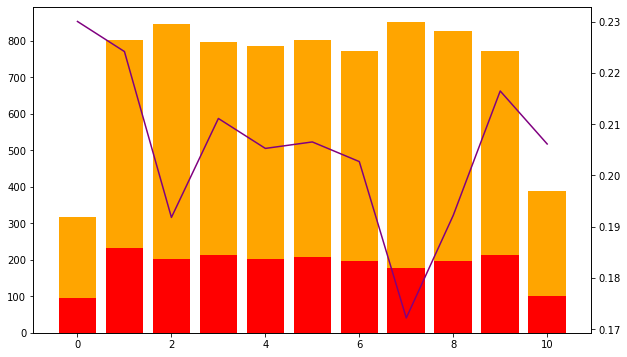

In [34]:
fig, ax = plt.subplots(figsize = [10,6])
ax.bar(x=df_ten['Tenure'], height = df_ten['Count_inexit'], label = 'Count_inexit', color = 'Orange')
ax.bar(x=df_ten['Tenure'], height = df_ten['Count_exit'], label = 'Count_exit', color = 'Red')

ax2 = ax.twinx()
ax2.plot(df_ten['Tenure'], df_ten['Ratio'], color = 'Purple')

* số năm sử dụng dịch vụ chủ yếu từ 1 - 9 năm
* tỉ lệ rời bỏ không thay đổi quá lớn (20%), tuy nhiên, tỉ lệ này giảm sâu xuống còn 17% đối với nhóm người sử dụng dịch vụ 7 năm... Why?????

**Estimated Salary**

In [35]:
df_sal_estimated_ma = df[df['Gender'] == 'Male'][['EstimatedSalary', 'Exited']]
df_sal_estimated_ma

,EstimatedSalary,Exited
5,149756.71,1
6,10062.80,0
8,74940.50,0
9,71725.73,0
10,80181.12,0
...,...,...
9992,195192.40,0
9993,29179.52,0
9995,96270.64,0
9996,101699.77,0


In [36]:
df_sal_estimated_fe = df[df['Gender'] == 'Female'][['EstimatedSalary', 'Exited']]
df_sal_estimated_fe

,EstimatedSalary,Exited
0,101348.88,1
1,112542.58,0
2,113931.57,1
3,93826.63,0
4,79084.10,0
...,...,...
9982,115146.40,1
9991,69384.71,1
9994,167773.55,0
9997,42085.58,1


In [37]:
df_sal_estimated_ma.groupby('Exited').agg('mean')

,EstimatedSalary
Exited,
0,99680.391827
1,99584.287272


In [38]:
df_sal_estimated_fe.groupby('Exited').agg('mean')

,EstimatedSalary
Exited,
0,99816.071486
1,102948.986093


* Mức lương trung bình giữa nhóm người churn và không có sự khác biệt lớn đối với cả hai giới


**Geography**

In [39]:
df_geo = df.groupby('Geography').agg('count')
df_geo

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,,,,
France,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014
Germany,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509
Spain,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477


In [40]:
df_geo.reset_index(drop = False, inplace = True)

In [41]:
df_geo = df_geo[['Geography', 'CreditScore']]
df_geo = df_geo.rename(columns = {'CreditScore': 'Count'})


In [42]:
df_geo

,Geography,Count
0,France,5014
1,Germany,2509
2,Spain,2477


In [43]:
df_geo_exit = df[df['Exited'] == 1].groupby('Geography').agg('count')
df_geo_exit

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,,,,
France,810,810,810,810,810,810,810,810,810,810,810,810,810
Germany,814,814,814,814,814,814,814,814,814,814,814,814,814
Spain,413,413,413,413,413,413,413,413,413,413,413,413,413


In [44]:
df_geo_exit.reset_index(drop = False, inplace = True)
df_geo_exit

,Geography,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,810,810,810,810,810,810,810,810,810,810,810,810,810
1,Germany,814,814,814,814,814,814,814,814,814,814,814,814,814
2,Spain,413,413,413,413,413,413,413,413,413,413,413,413,413


In [45]:
df_geo_exit = df_geo_exit[['Geography', 'Age']]
df_geo_exit

,Geography,Age
0,France,810
1,Germany,814
2,Spain,413


In [46]:
df_geo_exit = df_geo_exit.rename(columns = {'Age': 'Count'})
df_geo_exit

,Geography,Count
0,France,810
1,Germany,814
2,Spain,413


In [47]:
df_geo['Count_exit'] = df_geo_exit['Count']
df_geo

,Geography,Count,Count_exit
0,France,5014,810
1,Germany,2509,814
2,Spain,2477,413


In [48]:
df_geo_inexit = df[df['Exited'] == 0].groupby('Geography').agg('count')
df_geo_inexit

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,,,,
France,4204,4204,4204,4204,4204,4204,4204,4204,4204,4204,4204,4204,4204
Germany,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695
Spain,2064,2064,2064,2064,2064,2064,2064,2064,2064,2064,2064,2064,2064


In [49]:
df_geo_inexit.reset_index(drop = False, inplace = True)

In [50]:
df_geo_inexit = df_geo_inexit[['Geography', 'Age']]

In [51]:
df_geo['Count_inexit'] = df_geo_inexit['Age']
df_geo

,Geography,Count,Count_exit,Count_inexit
0,France,5014,810,4204
1,Germany,2509,814,1695
2,Spain,2477,413,2064


In [52]:
df_geo['ratio'] = df_geo['Count_exit']/(df_geo['Count_exit']+ df_geo['Count_inexit'])
df_geo

,Geography,Count,Count_exit,Count_inexit,ratio
0,France,5014,810,4204,0.161548
1,Germany,2509,814,1695,0.324432
2,Spain,2477,413,2064,0.166734


**Pháp là nước có số lượng khảo sát nhiều nhất. Trong khi đó, Đức lại là nước có tỉ lệ rời bỏ cao nhất, gấp đôi pháp và TBN**

In [53]:
df_france = df[df['Geography'] == 'France']
df_france

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [54]:
df_germany = df[df['Geography'] == 'Germany']
df_germany

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
15,16,15643966,Goforth,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
26,27,15736816,Young,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0
28,29,15728693,McWilliams,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9984,9985,15696175,Echezonachukwu,602,Germany,Male,35,7,90602.42,2,1,1,51695.41,0
9986,9987,15581736,Bartlett,673,Germany,Male,47,1,183579.54,2,0,1,34047.54,0
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0


In [55]:
df_spain = df[df['Geography'] == 'Spain']

In [56]:
df_spain

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
11,12,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0
14,15,15600882,Scott,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,9967,15590213,Ch'en,479,Spain,Male,35,4,125920.98,1,1,1,20393.44,0
9980,9981,15719276,T'ao,741,Spain,Male,35,6,74371.49,1,0,0,99595.67,0
9987,9988,15588839,Mancini,606,Spain,Male,30,8,180307.73,2,1,1,1914.41,0
9989,9990,15605622,McMillan,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0


In [57]:
df_france.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,5014.000000,5.014000e+03,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000
mean,5025.228560,1.569065e+07,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
std,2873.666719,7.137584e+04,97.016799,10.469459,2.888475,64133.565524,0.570347,0.455356,0.499769,57336.289016,0.368072
min,1.000000,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,2585.250000,1.562861e+07,582.000000,31.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51399.190000,0.000000
50%,5003.500000,1.569077e+07,653.000000,37.000000,5.000000,62153.500000,1.000000,1.000000,1.000000,99132.310000,0.000000
75%,7495.750000,1.575217e+07,717.000000,43.000000,7.000000,121444.877500,2.000000,1.000000,1.000000,149295.360000,0.000000
max,10000.000000,1.581566e+07,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199929.170000,1.000000


In [58]:
df_germany.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2509.000000,2.509000e+03,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.00000,2509.000000,2509.000000,2509.000000
mean,5000.278996,1.569056e+07,651.453567,39.771622,5.009964,119730.116134,1.519729,0.71383,0.497409,101113.435102,0.324432
std,2918.980192,7.322843e+04,98.168937,10.519143,2.935154,27022.006157,0.619420,0.45206,0.500093,58263.011501,0.468256
min,8.000000,1.556578e+07,350.000000,18.000000,0.000000,27288.430000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2461.000000,1.562740e+07,584.000000,32.000000,2.000000,102800.720000,1.000000,0.00000,0.000000,51016.020000,0.000000
50%,4997.000000,1.568989e+07,651.000000,38.000000,5.000000,119703.100000,1.000000,1.00000,0.000000,102397.220000,0.000000
75%,7583.000000,1.575573e+07,722.000000,45.000000,8.000000,137560.380000,2.000000,1.00000,1.000000,151083.800000,1.000000
max,9999.000000,1.581566e+07,850.000000,84.000000,10.000000,214346.960000,4.000000,1.00000,1.000000,199970.740000,1.000000


In [59]:
df_spain.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2477.000000,2.477000e+03,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000
mean,4950.667743,1.569192e+07,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734
std,2881.454458,7.176554e+04,94.365051,10.446119,2.856660,64235.555208,0.564646,0.460588,0.499220,57103.678091,0.372813
min,2.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,417.410000,0.000000
25%,2356.000000,1.562954e+07,587.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50267.690000,0.000000
50%,5000.000000,1.569179e+07,651.000000,37.000000,5.000000,61710.440000,2.000000,1.000000,1.000000,99984.860000,0.000000
75%,7435.000000,1.575375e+07,715.000000,44.000000,8.000000,121056.630000,2.000000,1.000000,1.000000,147278.430000,0.000000
max,9993.000000,1.581569e+07,850.000000,88.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


* Phiếu khảo sát từ người Đức nhiều gấp đôi 2 nước còn lại
* Đức có tỉ lệ churn cao nhất
* Đức có estimated Salary và cả Balance đều cao hơn so với 2 nước còn lại
* Số dư trong tài khoản không có ảnh hưởng đến khả năng churn (cần kiểm chứng???)

In [60]:
df_germany[(df_germany['Tenure'] == 7) & (df_germany['Exited'] == 1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
166,167,15724623,Taubman,704,Germany,Female,24,7,113034.22,1,1,0,162503.48,1
215,216,15723488,Watson,668,Germany,Male,47,7,106854.21,1,0,1,157959.02,1
422,423,15674551,Fitch,535,Germany,Male,40,7,111756.50,1,1,0,8128.32,1
590,591,15788291,Okwuadigbo,713,Germany,Female,38,7,144606.22,1,1,1,56594.36,1
677,678,15715142,Repina,739,Germany,Male,45,7,102703.62,1,0,1,147802.94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9314,9315,15645371,Cameron,613,Germany,Female,51,7,147262.11,1,1,1,53630.90,1
9556,9557,15780909,Caffyn,769,Germany,Male,34,7,115101.50,1,0,0,57841.89,1
9600,9601,15570533,Conti,621,Germany,Female,55,7,131033.76,1,0,1,75685.59,1
9728,9729,15764916,Rowley,616,Germany,Female,43,7,95984.21,1,0,1,115262.54,1


In [61]:
df[(df['Tenure'] == 7) & (df['Exited'] == 1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
155,156,15679145,Chou,706,Spain,Male,57,7,0.00,1,1,0,17941.16,1
166,167,15724623,Taubman,704,Germany,Female,24,7,113034.22,1,1,0,162503.48,1
215,216,15723488,Watson,668,Germany,Male,47,7,106854.21,1,0,1,157959.02,1
268,269,15717398,Fielding,549,Spain,Female,39,7,0.00,1,0,0,81259.25,1
297,298,15684173,Chang,687,Spain,Female,44,7,0.00,3,1,0,155853.52,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9738,9739,15664547,Black,760,France,Male,37,7,0.00,1,0,0,32863.24,1
9756,9757,15662698,Ko,648,Spain,Female,43,7,81153.82,1,1,1,144532.85,1
9910,9911,15784042,L?,624,France,Male,55,7,118793.60,1,1,1,95022.02,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1


**Vẫn chưa giải thích được vì sao với Tenure = 7 thì tỉ lệ Exited lại giảm mạnh**

**Balance**

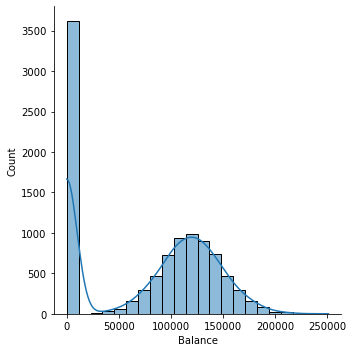

In [62]:
sns.displot(df['Balance'], kde = True)

C:\Users\dieph\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance', ylabel='Density'>

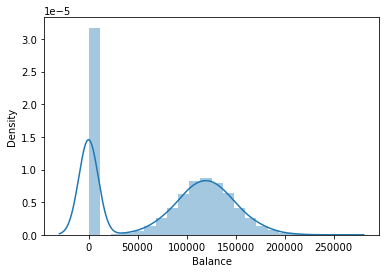

In [63]:
sns.distplot(df['Balance'])

* Số lượng (tỉ lệ) khách hàng giữ số dư tài khoản = 0 rất cao
* Phần còn lại phân phối đều
* Liệu có phải những khách hàng không giữ tiền trong tài khoản làm tỉ lệ churn tăng lên???

In [64]:
df_0 = df[df['Balance'] ==0]
len(df_0[df_0['Exited']==1])/len(df_0)

0.13823610727121924

In [65]:
def group_bal(bal):
    if int(bal) == 0:
        return 0
    elif int(bal) in range(1, 50000):
        return 1
    elif int(bal) in range(50000, 100000):
        return 50
    elif int(bal) in range(100000, 150000):
        return 100
    elif int(bal) in range(150000, 200000):
        return 150
    elif int(bal) in range(200000, 250000):
        return 200
    else:
        return 250

In [66]:
df['Group_bal'] = df['Balance'].map(group_bal)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Group_bal
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,50
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,150
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,50
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,50


In [67]:
df_group_bal = df.groupby('Group_bal').agg('count')

In [68]:
df_group_bal.reset_index(drop = False, inplace = True)

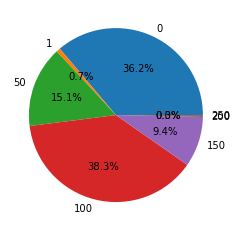

In [69]:
fig1, ax1 = plt.subplots()
ax1.pie(df_group_bal['Age'], labels = df_group_bal['Group_bal'], autopct = '%.1f%%')
plt.show()

* tỉ lệ người có balance = 0 chiếm tỉ trọng lớn (36,2%), chỉ thấp hơn nhóm người có balance từ 100-150k

In [70]:
df_bal = df.groupby(['Group_bal', 'Exited']).agg('count')
df_bal

RowNumber  CustomerId  Surname  CreditScore  Geography  \
Group_bal Exited                                                           
0         0            3117        3117     3117         3117       3117   
          1             500         500      500          500        500   
1         0              49          49       49           49         49   
          1              26          26       26           26         26   
50        0            1209        1209     1209         1209       1209   
          1             300         300      300          300        300   
100       0            2843        2843     2843         2843       2843   
          1             987         987      987          987        987   
150       0             730         730      730          730        730   
          1             205         205      205          205        205   
200       0              15          15       15           15         15   
          1              18          18       18           18         18   
250       1               1           1        1            1          1   

                  Gender   Age  Tenure  Balance  NumOfProducts  HasCrCard  \
Group_bal Exited                                                            
0         0         3117  3117    3117     3117           3117       3117   
          1          500   500     500      500            500        500   
1         0           49    49      49       49             49         49   
          1           26    26      26       26             26         26   
50        0         1209  1209    1209     1209           1209       1209   
          1          300   300     300      300            300        300   
100       0         2843  2843    2843     2843           2843       2843   
          1          987   987     987      987            987        987   
150       0          730   730     730      730            730        730   
          1          205   205     205      205            205        205   
200       0           15    15      15       15             15         15   
          1           18    18      18       18             18         18   
250       1            1     1       1        1              1          1   

                  IsActiveMember  EstimatedSalary  
Group_bal Exited                                   
0         0                 3117             3117  
          1                  500              500  
1         0                   49               49  
          1                   26               26  
50        0                 1209             1209  
          1                  300              300  
100       0                 2843             2843  
          1                  987              987  
150       0                  730              730  
          1                  205              205  
200       0                   15               15  
          1                   18               18  
250       1                    1                1

In [71]:
df_bal.reset_index(drop = False, inplace = True)

In [72]:
df_bal = df_bal[['Group_bal', 'Exited', 'Age']]

In [73]:
df_bal = df_bal.rename(columns = {'Age': 'Count'})

In [74]:
df_bal

,Group_bal,Exited,Count
0,0,0,3117
1,0,1,500
2,1,0,49
3,1,1,26
4,50,0,1209
5,50,1,300
6,100,0,2843
7,100,1,987
8,150,0,730
9,150,1,205


In [75]:
df_bal_ex = df_bal[df_bal['Exited'] == 1]
df_bal_ex

,Group_bal,Exited,Count
1,0,1,500
3,1,1,26
5,50,1,300
7,100,1,987
9,150,1,205
11,200,1,18
12,250,1,1


In [76]:
df_bal_inex = df_bal[df_bal['Exited'] == 0]
df_bal_inex

,Group_bal,Exited,Count
0,0,0,3117
2,1,0,49
4,50,0,1209
6,100,0,2843
8,150,0,730
10,200,0,15


In [77]:
df_balance = pd.merge(df_bal_inex, df_bal_ex, how = 'outer', on = 'Group_bal', suffixes=('_inexit', '_exit'))
df_balance

,Group_bal,Exited_inexit,Count_inexit,Exited_exit,Count_exit
0,0,0.0,3117.0,1,500
1,1,0.0,49.0,1,26
2,50,0.0,1209.0,1,300
3,100,0.0,2843.0,1,987
4,150,0.0,730.0,1,205
5,200,0.0,15.0,1,18
6,250,NaN,NaN,1,1


In [78]:
df_balance["Ratio"] = df_balance['Count_exit']/(df_balance['Count_exit']+df_balance['Count_inexit'])
df_balance

,Group_bal,Exited_inexit,Count_inexit,Exited_exit,Count_exit,Ratio
0,0,0.0,3117.0,1,500,0.138236
1,1,0.0,49.0,1,26,0.346667
2,50,0.0,1209.0,1,300,0.198807
3,100,0.0,2843.0,1,987,0.257702
4,150,0.0,730.0,1,205,0.219251
5,200,0.0,15.0,1,18,0.545455
6,250,NaN,NaN,1,1,NaN


**Duy trì số dư tài khoản = 0 không đồng nghĩa với tỉ lệ churn cao**

**Has credit card**

In [79]:
df_CreditCard = df.groupby(['HasCrCard', 'Exited']).agg('count')
df_CreditCard

RowNumber  CustomerId  Surname  CreditScore  Geography  \
HasCrCard Exited                                                           
0         0            2332        2332     2332         2332       2332   
          1             613         613      613          613        613   
1         0            5631        5631     5631         5631       5631   
          1            1424        1424     1424         1424       1424   

                  Gender   Age  Tenure  Balance  NumOfProducts  \
HasCrCard Exited                                                 
0         0         2332  2332    2332     2332           2332   
          1          613   613     613      613            613   
1         0         5631  5631    5631     5631           5631   
          1         1424  1424    1424     1424           1424   

                  IsActiveMember  EstimatedSalary  Group_bal  
HasCrCard Exited                                              
0         0                 2332             2332       2332  
          1                  613              613        613  
1         0                 5631             5631       5631  
          1                 1424             1424       1424

In [80]:
df_CreditCard.reset_index(drop = False, inplace = True)

In [81]:
df_CreditCard = df_CreditCard[['HasCrCard', 'Exited', 'Age']]
df_CreditCard = df_CreditCard.rename(columns= {'Age': 'Count'})
df_CreditCard

,HasCrCard,Exited,Count
0,0,0,2332
1,0,1,613
2,1,0,5631
3,1,1,1424


In [82]:
df_CreditCard_exit = df_CreditCard[df_CreditCard['Exited'] == 1]
df_CreditCard_exit

,HasCrCard,Exited,Count
1,0,1,613
3,1,1,1424


In [83]:
df_CreditCard_inexit = df_CreditCard[df_CreditCard['Exited'] == 0]
df_CreditCard_inexit

,HasCrCard,Exited,Count
0,0,0,2332
2,1,0,5631


In [84]:
df_test = pd.merge(df_CreditCard_exit, df_CreditCard_inexit, how = 'outer', on = 'HasCrCard')
df_test

,HasCrCard,Exited_x,Count_x,Exited_y,Count_y
0,0,1,613,0,2332
1,1,1,1424,0,5631


In [85]:
df_test.drop(columns = ['Exited_x', 'Exited_y'], inplace = True)
df_test

,HasCrCard,Count_x,Count_y
0,0,613,2332
1,1,1424,5631


In [86]:
df_CreditCard = df_test.rename(columns = {'Count_x': 'Count_exit', 'Count_y': 'Count_inexit'})

In [87]:
df_CreditCard

,HasCrCard,Count_exit,Count_inexit
0,0,613,2332
1,1,1424,5631


In [88]:
df_CreditCard['ratio'] = df_CreditCard['Count_exit']/(df_CreditCard['Count_exit'] + df_CreditCard['Count_inexit'])

In [89]:
df_CreditCard

,HasCrCard,Count_exit,Count_inexit,ratio
0,0,613,2332,0.208149
1,1,1424,5631,0.201843


Việc sử dụng thẻ tín dụng không ảnh hưởng đến tỉ lệ rời bỏ 

**Credit Score**

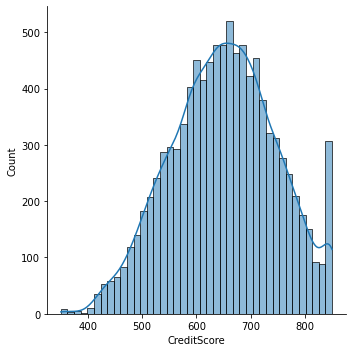

In [90]:
sns.displot(df['CreditScore'], kde = True)

In [91]:
nation = df['Geography'].unique()
nation

array(['France', 'Spain', 'Germany'], dtype=object)

In [92]:
nation = list(nation)
nation

['France', 'Spain', 'Germany']

C:\Users\dieph\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dieph\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dieph\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

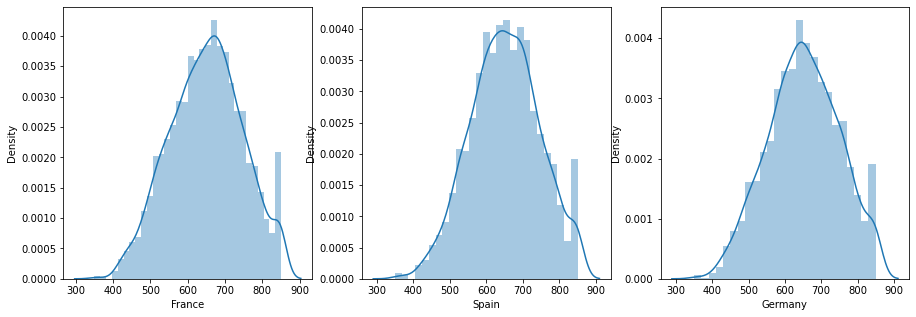

In [93]:
fig, axes = plt.subplots(1,3, figsize = (10,5))
for index, i in enumerate(nation):
    y = index%3
    sns.distplot(df[df['Geography'] == i]['CreditScore'], ax = axes[y], axlabel = i)
    
plt.subplots_adjust(hspace = 1, right = 1.3)

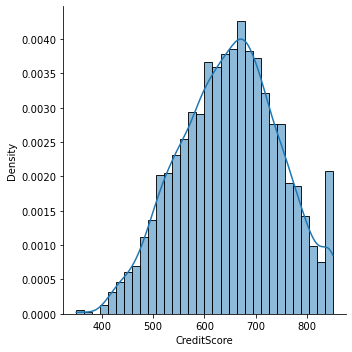

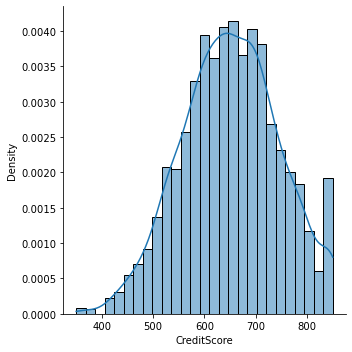

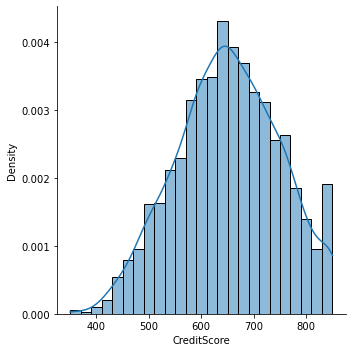

In [94]:
for index, i in enumerate(nation):
    y = index
    sns.displot(df[df['Geography'] == i]['CreditScore'], kde = True, stat = 'density')

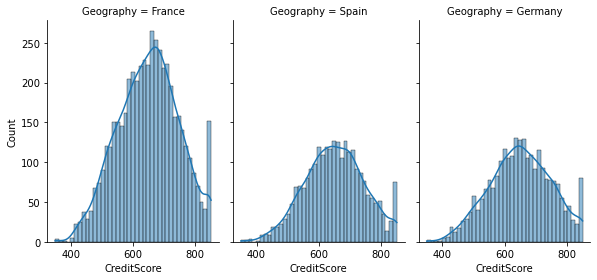

In [95]:
sns.displot(df[['Geography', 'CreditScore']], x = 'CreditScore', col = 'Geography', height = 4, aspect = 0.7, kde = True)

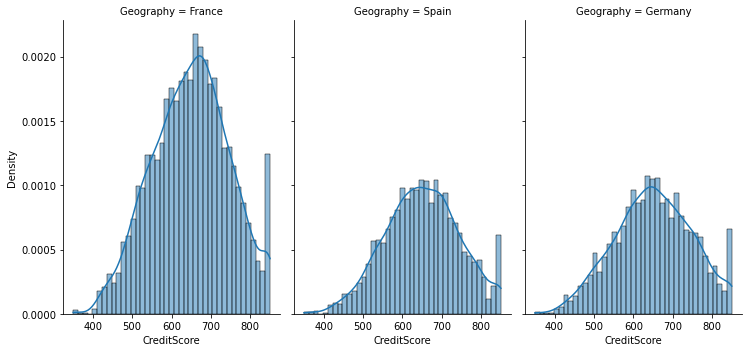

In [96]:
sns.displot(df[['Geography', 'CreditScore']], x = 'CreditScore', col = 'Geography',height = 5, aspect = 0.7, kde = True, stat="density")


**Lưu ý vẽ Density như thế này là density trên tổng, không phải đối với từng nation**

**Is Active Member**

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

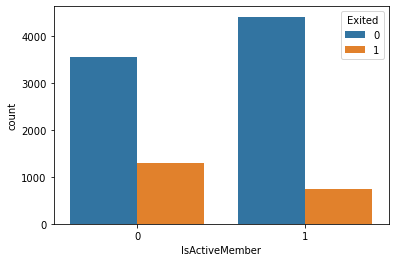

In [97]:
sns.countplot(data = df, x = "IsActiveMember", hue = 'Exited')

**Member active có tỉ lệ rời bỏ thấp hơn**

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

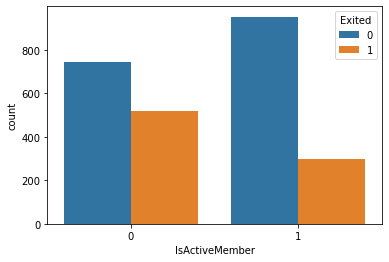

In [98]:
sns.countplot(data = df[df['Geography'] == 'Germany'],x = "IsActiveMember", hue = 'Exited')

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

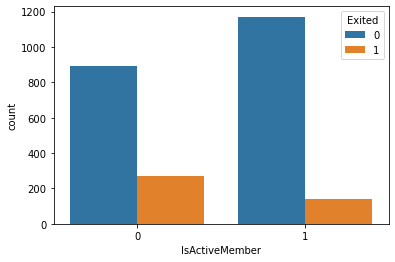

In [99]:
sns.countplot(data = df[df['Geography'] == 'Spain'],x = "IsActiveMember", hue = 'Exited')

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

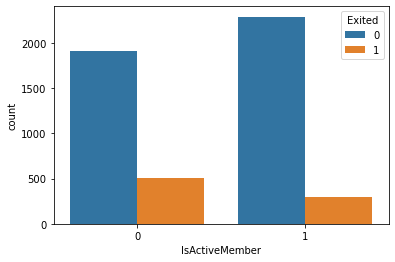

In [100]:
sns.countplot(data = df[df['Geography'] == 'France'],x = "IsActiveMember", hue = 'Exited')

**Tìm hiểu tiếp tại sao không sử dụng vòng for được????**

**Đối với từng quốc gia riêng biệt thì cũng rút ra được kết luận tương tự**

**Number of Products

In [101]:
df_products = df.groupby(['NumOfProducts', 'Exited']).agg('count')
df_products.reset_index(drop = False, inplace = True)
df_products

,NumOfProducts,Exited,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Group_bal
0,1,0,3675,3675,3675,3675,3675,3675,3675,3675,3675,3675,3675,3675,3675
1,1,1,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409
2,2,0,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242
3,2,1,348,348,348,348,348,348,348,348,348,348,348,348,348
4,3,0,46,46,46,46,46,46,46,46,46,46,46,46,46
5,3,1,220,220,220,220,220,220,220,220,220,220,220,220,220
6,4,1,60,60,60,60,60,60,60,60,60,60,60,60,60


In [102]:
df_products = df_products[['NumOfProducts', 'Exited', 'Age']]

In [103]:
df_products

,NumOfProducts,Exited,Age
0,1,0,3675
1,1,1,1409
2,2,0,4242
3,2,1,348
4,3,0,46
5,3,1,220
6,4,1,60


In [104]:
df_products = df_products.rename(columns = {'Age': 'Count'})

In [105]:
df_products

,NumOfProducts,Exited,Count
0,1,0,3675
1,1,1,1409
2,2,0,4242
3,2,1,348
4,3,0,46
5,3,1,220
6,4,1,60


<AxesSubplot:xlabel='NumOfProducts', ylabel='Count'>

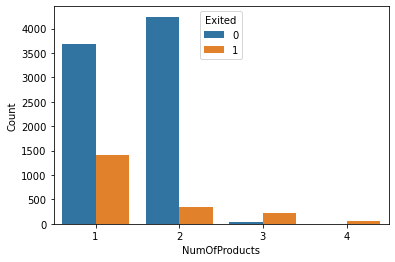

In [106]:
sns.barplot(data = df_products, x = "NumOfProducts", y = 'Count', hue = 'Exited')

**Kết luận: Những người không rời bỏ ngân hàng đều sử dụng một số lượng sản phẩm nhất định nhưng không qua 4 sản phẩm, những người sử dụng 4 sản phẩm lại đều rời bỏ ngân hàng**


**Geography and Gender**

In [107]:
df_geo_vs_gen = df.groupby(['Geography', 'Gender', 'Exited']).agg('count')

In [108]:
df_geo_vs_gen.reset_index(drop = False, inplace = True)

In [109]:
df_geo_vs_gen = df_geo_vs_gen[['Geography', 'Gender', 'Exited', 'Age']]
df_geo_vs_gen = df_geo_vs_gen.rename(columns = {'Age': 'Count'})

In [110]:
df_geo_vs_gen_exit = df_geo_vs_gen[df_geo_vs_gen['Exited'] == 1]

In [111]:
df_geo_vs_gen_exit

,Geography,Gender,Exited,Count
1,France,Female,1,460
3,France,Male,1,350
5,Germany,Female,1,448
7,Germany,Male,1,366
9,Spain,Female,1,231
11,Spain,Male,1,182


In [112]:
df_geo_vs_gen_exit['geo_gen'] = df_geo_vs_gen_exit.apply\
                                (lambda row: row['Geography'] + '-'\
                                + row['Gender'], axis = 1)
df_geo_vs_gen_exit

C:\Users\dieph\AppData\Local\Temp\ipykernel_9896\3176837091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo_vs_gen_exit['geo_gen'] = df_geo_vs_gen_exit.apply\


,Geography,Gender,Exited,Count,geo_gen
1,France,Female,1,460,France-Female
3,France,Male,1,350,France-Male
5,Germany,Female,1,448,Germany-Female
7,Germany,Male,1,366,Germany-Male
9,Spain,Female,1,231,Spain-Female
11,Spain,Male,1,182,Spain-Male


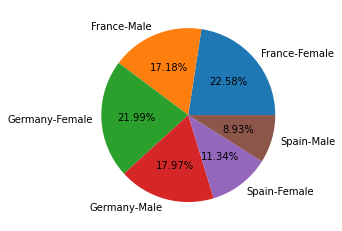

In [113]:
labels = df_geo_vs_gen_exit ['geo_gen']
fig1,ax1 = plt.subplots()
ax1.pie(df_geo_vs_gen_exit['Count'], labels = labels, autopct='%1.2f%%')
plt.show()

**Kết luận: Nữ giới dễ rời bỏ hơn, đặc biệt là nữ giới ở Pháp và ở Đức**

In [114]:
df_geo_vs_gen_inexit = df_geo_vs_gen[df_geo_vs_gen['Exited'] == 0]
df_geo_vs_gen_inexit['geo_gen'] = df_geo_vs_gen_inexit.apply\
                                (lambda row: row['Geography'] + '-'\
                                + row['Gender'], axis = 1)
df_geo_vs_gen_inexit

C:\Users\dieph\AppData\Local\Temp\ipykernel_9896\3275206068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo_vs_gen_inexit['geo_gen'] = df_geo_vs_gen_inexit.apply\


,Geography,Gender,Exited,Count,geo_gen
0,France,Female,0,1801,France-Female
2,France,Male,0,2403,France-Male
4,Germany,Female,0,745,Germany-Female
6,Germany,Male,0,950,Germany-Male
8,Spain,Female,0,858,Spain-Female
10,Spain,Male,0,1206,Spain-Male


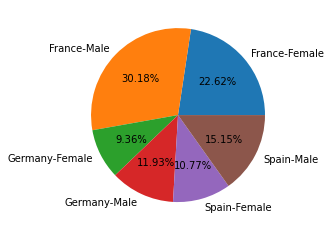

In [115]:
labels = df_geo_vs_gen_inexit ['geo_gen']
fig1,ax1 = plt.subplots()
ax1.pie(df_geo_vs_gen_inexit['Count'], labels = labels, autopct='%1.2f%%')
plt.show()

**Nam giới ở Pháp không rời bỏ chiếm tỉ trọng cao**

**Đức là nước có tỉ lệ churn cao (dù số lượng phiếu khảo sát thấp)**

In [116]:
df_geo_vs_gen_sum = pd.merge(df_geo_vs_gen_exit, df_geo_vs_gen_inexit,\
                    how = 'outer', on = ['geo_gen', 'Geography', 'Gender'],\
                     suffixes = ('_ex', '_inex'))
df_geo_vs_gen_sum

,Geography,Gender,Exited_ex,Count_ex,geo_gen,Exited_inex,Count_inex
0,France,Female,1,460,France-Female,0,1801
1,France,Male,1,350,France-Male,0,2403
2,Germany,Female,1,448,Germany-Female,0,745
3,Germany,Male,1,366,Germany-Male,0,950
4,Spain,Female,1,231,Spain-Female,0,858
5,Spain,Male,1,182,Spain-Male,0,1206


In [117]:
df_geo_vs_gen_sum['ratio'] = df_geo_vs_gen_sum['Count_ex']\
                            /(df_geo_vs_gen_sum['Count_ex']\
                            + df_geo_vs_gen_sum['Count_inex'])
df_geo_vs_gen_sum

,Geography,Gender,Exited_ex,Count_ex,geo_gen,Exited_inex,Count_inex,ratio
0,France,Female,1,460,France-Female,0,1801,0.203450
1,France,Male,1,350,France-Male,0,2403,0.127134
2,Germany,Female,1,448,Germany-Female,0,745,0.375524
3,Germany,Male,1,366,Germany-Male,0,950,0.278116
4,Spain,Female,1,231,Spain-Female,0,858,0.212121
5,Spain,Male,1,182,Spain-Male,0,1206,0.131124


**Ở Đức, tỉ lệ nam giới churn chiếm tỉ lệ cao**

**Tỉ lệ nữ giới churn ở cả 3 quốc gia tương đương nhau**

<AxesSubplot:xlabel='geo_gen', ylabel='ratio'>

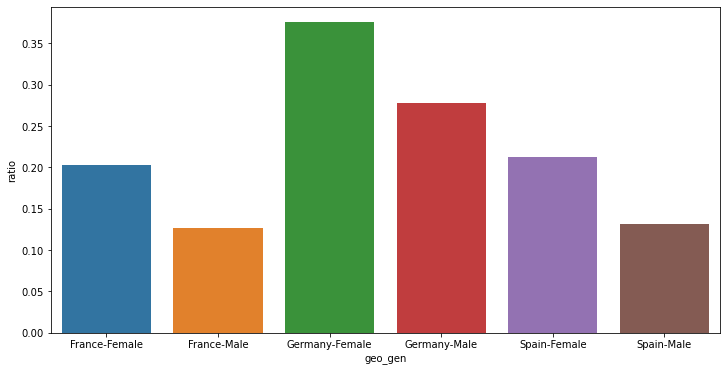

In [118]:
fig, ax = plt.subplots(figsize = [12,6])
sns.barplot(data =df_geo_vs_gen_sum, x = 'geo_gen', y ='ratio')
#Biểu đồ thể hiện tỉ lệ churn của từng giới tính mỗi quốc gia 

**Tenure vs Gender**

In [119]:
df_ten_vs_gen = df.groupby(['Tenure', 'Gender', 'Exited']).agg('count')
df_ten_vs_gen.reset_index(drop = False, inplace = True)
df_ten_vs_gen = df_ten_vs_gen[['Tenure', 'Gender', 'Exited', 'Age']]
df_ten_vs_gen.rename(columns= {'Age': 'Count'})
df_ten_vs_gen

,Tenure,Gender,Exited,Age
0,0,Female,0,149
1,0,Female,1,55
2,0,Male,0,169
3,0,Male,1,40
4,1,Female,0,348
5,1,Female,1,130
6,1,Male,0,455
7,1,Male,1,102
8,2,Female,0,367
9,2,Female,1,113


In [120]:
df_ten_vs_gen = df_ten_vs_gen.rename(columns= {'Age': 'Count'})
df_ten_vs_gen

,Tenure,Gender,Exited,Count
0,0,Female,0,149
1,0,Female,1,55
2,0,Male,0,169
3,0,Male,1,40
4,1,Female,0,348
5,1,Female,1,130
6,1,Male,0,455
7,1,Male,1,102
8,2,Female,0,367
9,2,Female,1,113


<AxesSubplot:xlabel='Tenure', ylabel='Count'>

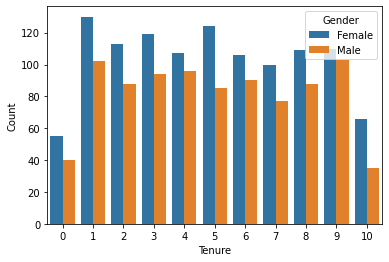

In [121]:
''' 
Biểu đồ phân bổ tỉ lệ churn của từng nhóm người thâm niên sử dụng
dịch vụ phân theo giới tính
'''
sns.barplot(x = df_ten_vs_gen[df_ten_vs_gen['Exited'] == 1]['Tenure'],\
           y = df_ten_vs_gen['Count'], hue = df_ten_vs_gen['Gender'])

<AxesSubplot:xlabel='Tenure', ylabel='Count'>

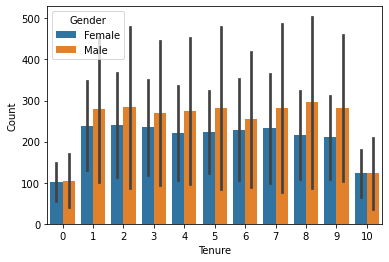

In [122]:
sns.barplot(data = df_ten_vs_gen, x = 'Tenure', y = 'Count',\
            hue = 'Gender')

<AxesSubplot:xlabel='Tenure', ylabel='Count'>

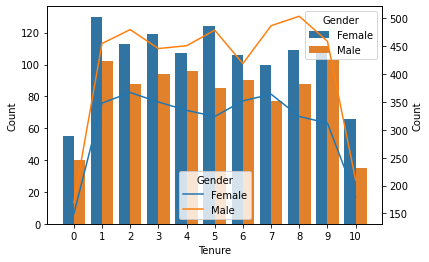

In [123]:
ax1 = sns.barplot(x = df_ten_vs_gen[df_ten_vs_gen['Exited'] == 1]['Tenure'],\
           y = df_ten_vs_gen['Count'], hue = df_ten_vs_gen['Gender'])
ax2 = ax1.twinx()
sns.lineplot(x = df_ten_vs_gen[df_ten_vs_gen['Exited'] == 0]['Tenure'],\
           y = df_ten_vs_gen['Count'], hue = df_ten_vs_gen['Gender'])

**Tỉ lệ nữ churn qua từng năm sử dụng dịch vụ đều cao hơn nam giới**

In [124]:
df_ten_vs_gen_exit = df_ten_vs_gen[df_ten_vs_gen['Exited'] == 1]
df_ten_vs_gen_exit

,Tenure,Gender,Exited,Count
1,0,Female,1,55
3,0,Male,1,40
5,1,Female,1,130
7,1,Male,1,102
9,2,Female,1,113
11,2,Male,1,88
13,3,Female,1,119
15,3,Male,1,94
17,4,Female,1,107
19,4,Male,1,96


In [125]:
df_ten_vs_gen_inexit = df_ten_vs_gen[df_ten_vs_gen['Exited'] == 0]
df_ten_vs_gen_inexit

,Tenure,Gender,Exited,Count
0,0,Female,0,149
2,0,Male,0,169
4,1,Female,0,348
6,1,Male,0,455
8,2,Female,0,367
10,2,Male,0,480
12,3,Female,0,350
14,3,Male,0,446
16,4,Female,0,335
18,4,Male,0,451


In [126]:
df_ten_vs_gen_merge = pd.merge(df_ten_vs_gen_exit, df_ten_vs_gen_inexit,\
                            how = 'outer', on = ['Tenure', 'Gender'],\
                            suffixes = ('_ex', '_inex'))
df_ten_vs_gen_merge

,Tenure,Gender,Exited_ex,Count_ex,Exited_inex,Count_inex
0,0,Female,1,55,0,149
1,0,Male,1,40,0,169
2,1,Female,1,130,0,348
3,1,Male,1,102,0,455
4,2,Female,1,113,0,367
5,2,Male,1,88,0,480
6,3,Female,1,119,0,350
7,3,Male,1,94,0,446
8,4,Female,1,107,0,335
9,4,Male,1,96,0,451


In [127]:
df_ten_vs_gen_merge['ratio'] = df_ten_vs_gen_merge['Count_ex']\
                                /(df_ten_vs_gen_merge['Count_ex']\
                                 + df_ten_vs_gen_merge['Count_inex'])

In [128]:
df_ten_vs_gen_merge

,Tenure,Gender,Exited_ex,Count_ex,Exited_inex,Count_inex,ratio
0,0,Female,1,55,0,149,0.269608
1,0,Male,1,40,0,169,0.191388
2,1,Female,1,130,0,348,0.271967
3,1,Male,1,102,0,455,0.183124
4,2,Female,1,113,0,367,0.235417
5,2,Male,1,88,0,480,0.154930
6,3,Female,1,119,0,350,0.253731
7,3,Male,1,94,0,446,0.174074
8,4,Female,1,107,0,335,0.242081
9,4,Male,1,96,0,451,0.175503


<AxesSubplot:xlabel='Tenure', ylabel='ratio'>

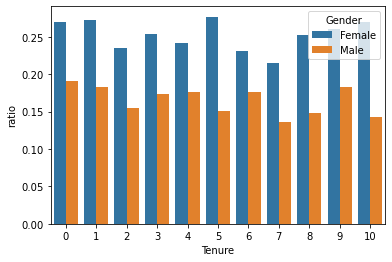

In [129]:
sns.barplot(data = df_ten_vs_gen_merge, x = 'Tenure', y = 'ratio',\
           hue = 'Gender')

**Đối với câu hỏi về Tenure = 7 thì có tỉ lệ churn thấp nhất**

In [130]:
for i in range(1,10):
    ratio = len(df[(df['Geography'] == 'Germany') & (df['Tenure'] == i)])\
    /len(df[df['Tenure'] == i])
    print (f'Tỉ lệ người Đức trong nhóm người thâm niên {i} năm là {ratio}')

Tỉ lệ người Đức trong nhóm người thâm niên 1 năm là 0.25507246376811593
Tỉ lệ người Đức trong nhóm người thâm niên 2 năm là 0.26240458015267176
Tỉ lệ người Đức trong nhóm người thâm niên 3 năm là 0.25867195242814667
Tỉ lệ người Đức trong nhóm người thâm niên 4 năm là 0.2345803842264914
Tỉ lệ người Đức trong nhóm người thâm niên 5 năm là 0.25592885375494073
Tỉ lệ người Đức trong nhóm người thâm niên 6 năm là 0.23474663908996898
Tỉ lệ người Đức trong nhóm người thâm niên 7 năm là 0.2188715953307393
Tỉ lệ người Đức trong nhóm người thâm niên 8 năm là 0.2575609756097561
Tỉ lệ người Đức trong nhóm người thâm niên 9 năm là 0.2733739837398374


**Như vậy, người Đức có tỉ lệ churn cao nhất, nhưng tỉ lệ người Đức có thâm niên 7 năm sử dụng dịch vụ lại có tỉ lệ thấp nhất nên đã kéo tỉ lệ churn xuống thấp => đúng như dự đoán ban đầu**

**Number of products and Geography**

In [131]:
df_numProd_vs_geo = df.groupby(['Geography', 'NumOfProducts', 'Exited'])\
                .agg('count')

In [132]:
df_numProd_vs_geo.reset_index(drop = False, inplace = True)
df_numProd_vs_geo = df_numProd_vs_geo[['Geography', 'NumOfProducts', 'Exited', 'Age']]
df_numProd_vs_geo = df_numProd_vs_geo.rename(columns = {'Age': 'Count'})
df_numProd_vs_geo

,Geography,NumOfProducts,Exited,Count
0,France,1,0,1950
1,France,1,1,564
2,France,2,0,2232
3,France,2,1,135
4,France,3,0,22
5,France,3,1,82
6,France,4,1,29
7,Germany,1,0,771
8,Germany,1,1,578
9,Germany,2,0,914


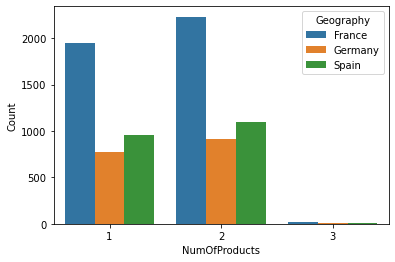

In [133]:
sns.barplot(data = df_numProd_vs_geo[df_numProd_vs_geo['Exited'] == 0],\
                    x = 'NumOfProducts',
                    y = 'Count',\
                    hue = 'Geography')
plt.show()

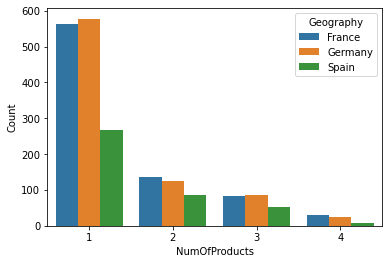

In [134]:
sns.barplot(data = df_numProd_vs_geo[df_numProd_vs_geo['Exited'] == 1],\
                    x = 'NumOfProducts',
                    y = 'Count',\
                    hue = 'Geography')
plt.show()

**Như đã nhận xét ở trên, tất cả khách hàng sử dụng 4 sản phẩm đều churn!!!!**

**Số người sử dụng 1-2 sản phẩm chiếm đa số ở cả 3 nước**


In [135]:
#Biểu đồ thể hiện tỉ lệ churn thông qua số sản phẩm sử dụng
df_products

,NumOfProducts,Exited,Count
0,1,0,3675
1,1,1,1409
2,2,0,4242
3,2,1,348
4,3,0,46
5,3,1,220
6,4,1,60


In [136]:
df_products_exit = df_products[df_products['Exited'] == 1]
df_products_inexit = df_products[df_products['Exited'] == 0]
df_producuts_sum = pd.merge(df_products_exit, df_products_inexit,\
                           how = 'outer', on = 'NumOfProducts',\
                            suffixes = ('_ex', '_inex'))
df_producuts_sum = df_producuts_sum.fillna(0)
df_producuts_sum['Count_sum'] = df_producuts_sum['Count_ex']+df_producuts_sum['Count_inex']
df_producuts_sum

,NumOfProducts,Exited_ex,Count_ex,Exited_inex,Count_inex,Count_sum
0,1,1,1409,0.0,3675.0,5084.0
1,2,1,348,0.0,4242.0,4590.0
2,3,1,220,0.0,46.0,266.0
3,4,1,60,0.0,0.0,60.0


In [137]:
df_producuts_sum['ratio'] = df_producuts_sum['Count_ex']/\
                            (df_producuts_sum['Count_ex']\
                            +df_producuts_sum['Count_inex'])
df_producuts_sum

,NumOfProducts,Exited_ex,Count_ex,Exited_inex,Count_inex,Count_sum,ratio
0,1,1,1409,0.0,3675.0,5084.0,0.277144
1,2,1,348,0.0,4242.0,4590.0,0.075817
2,3,1,220,0.0,46.0,266.0,0.827068
3,4,1,60,0.0,0.0,60.0,1.000000


<AxesSubplot:xlabel='NumOfProducts', ylabel='ratio'>

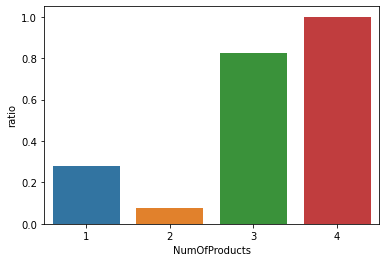

In [138]:
sns.barplot(data = df_producuts_sum, x = 'NumOfProducts',\
                   y = 'ratio')

**Từ đó rút ra kết luận: Tuy số người sử dụng 1-2 sản phẩm chiếm tỉ lệ lớn, từ đó có số lượng người churn lớn nhưng tỉ lệ churn lại rất cao đối với những người sử dụng 3-4 sản phẩm**

**Như vậy, có ít người sử dụng 3-4 sản phẩm, nhưng đa phần họ đều churn** (cần được giải thích thêm, do sản phẩm không tốt??? 

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

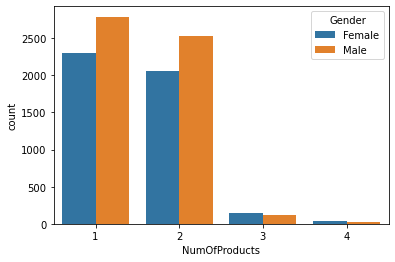

In [139]:
sns.countplot(data = df, x = 'NumOfProducts', hue = 'Gender')

**Nữ giới sử dụng 1-2 sản phẩm nhiều hơn, trong khi đó nam giới lại sử dụng 3-4 sản phẩm nhiều hơn**

## 3. Dectecting and handling outliers

**Outlier**

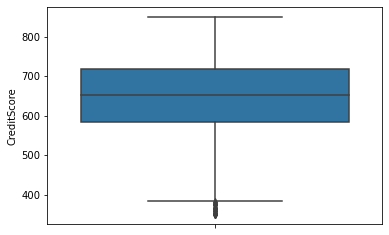

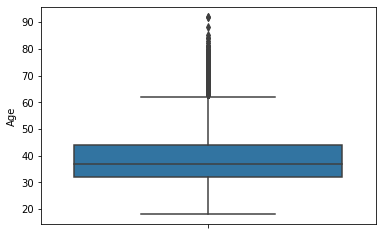

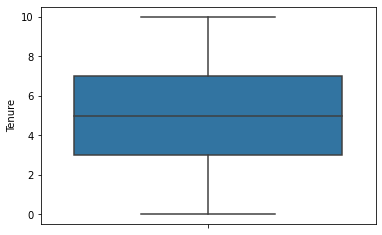

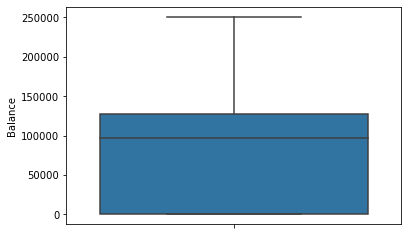

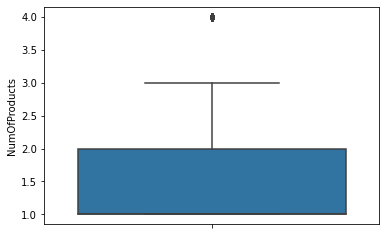

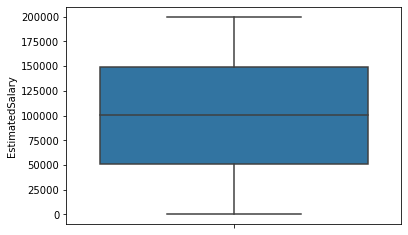

In [140]:
# Để xác định các giá trị ngoại lai, sử dụng boxplot
outlier_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for i in outlier_plot:
    sns.boxplot(y = df[i])
    plt.show()

**CreditScore, Age vaf NumOfProducts tồn tại ngoại lai (outliers)**

**Handling outliers**

In [141]:
df_copy = df.copy()
df_copy

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Group_bal
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,50
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,150
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,50
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,50


In [142]:
# Tim outliers
def dectec_outliers(col):
    first_qrt = np.quantile(df_copy[col], 0.25)
    third_qrt = np.quantile(df_copy[col], 0.75)
    
    lower_whisker = first_qrt - (third_qrt - first_qrt) * 1.5
    print(f'Lower wisker cua {col} la {lower_whisker}')
    
    upper_whisker = third_qrt + (third_qrt - first_qrt) * 1.5
    print(f'Upper whisker cua {col} la {upper_whisker}')
    
    outlier = df_copy[(df_copy[col] < lower_whisker)|\
                       (df_copy[col] > upper_whisker)]
    
    print(f'Number of ouliers: {len(outlier)}')
    
    print(f'% outliers: {len(outlier)*100/len(df_copy)}%')

In [143]:
# Xử lý outliers
df_cleaned = df_copy.copy()
import scipy.stats
def new_df(col, lower_lim, upper_lim):
    df_cleaned[col] = scipy.stats.mstats.winsorize(df_cleaned[col],\
                                        limits = [lower_lim, upper_lim])
    

**CreditScore**

In [144]:
dectec_outliers('CreditScore')

Lower wisker cua CreditScore la 383.0
Upper whisker cua CreditScore la 919.0
Number of ouliers: 15
% outliers: 0.15%


<AxesSubplot:ylabel='CreditScore'>

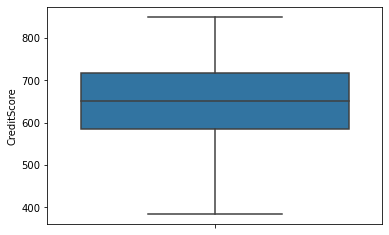

In [145]:
new_df('CreditScore',0.0015,0)
sns.boxplot(y = df_cleaned['CreditScore'])

**Age**

In [146]:
dectec_outliers('Age')

Lower wisker cua Age la 14.0
Upper whisker cua Age la 62.0
Number of ouliers: 359
% outliers: 3.59%


<AxesSubplot:ylabel='Age'>

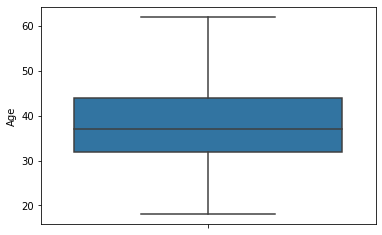

In [147]:
new_df('Age',0, 0.04)
sns.boxplot(y = df_cleaned['Age'])

**NumOfProducts**

In [148]:
dectec_outliers('NumOfProducts')

Lower wisker cua NumOfProducts la -0.5
Upper whisker cua NumOfProducts la 3.5
Number of ouliers: 60
% outliers: 0.6%


<AxesSubplot:ylabel='Age'>

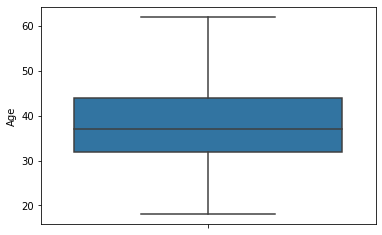

In [149]:
new_df('NumOfProducts',0, 0.06)
sns.boxplot(y = df_cleaned['Age'])

In [150]:
df_cleaned = df_cleaned.drop(columns = 'Group_bal')
df_cleaned

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,2,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [151]:
df_cleaned.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.561300,38.660800,5.012800,76485.889288,1.491600,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.558702,9.746704,2.892174,62397.405202,0.499954,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,383.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,62.000000,10.000000,250898.090000,2.000000,1.00000,1.000000,199992.480000,1.000000


## 4.Models

In [152]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Group_bal
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,60.562500
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,52.742007
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,50.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,100.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,250.000000


**Correlation**

In [153]:
corr = df_cleaned.corr()
corr

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005794,-0.000443,-0.006495,-0.009067,0.009676,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005429,0.008520,-0.014883,-0.012419,0.018501,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005794,0.005429,1.000000,-0.007703,0.000721,0.006389,0.014673,-0.005396,0.025537,-0.001150,-0.026455
Age,-0.000443,0.008520,-0.007703,1.000000,-0.011163,0.033021,-0.078123,-0.012717,0.072455,-0.007392,0.312436
Tenure,-0.006495,-0.014883,0.000721,-0.011163,1.000000,-0.012254,0.013423,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006389,0.033021,-0.012254,1.000000,-0.359646,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.009676,0.018501,0.014673,-0.078123,0.013423,-0.359646,1.000000,0.003845,0.022321,0.010663,-0.185447
HasCrCard,0.000599,-0.014025,-0.005396,-0.012717,0.022583,-0.014858,0.003845,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025537,0.072455,-0.028362,-0.010084,0.022321,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001150,-0.007392,0.007784,0.012797,0.010663,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:>

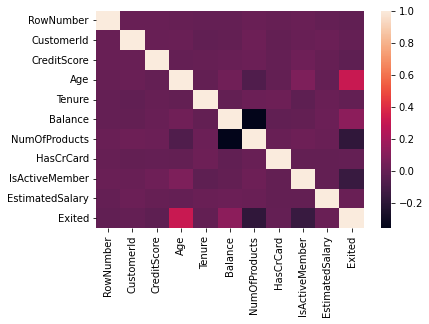

In [154]:
sns.heatmap(corr)

**Logistic Regression**

In [155]:
# Import các thư viện
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [156]:
sc = StandardScaler()
for i in ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']:
    df_cleaned[i] = sc.fit_transform(df_cleaned[i].values.reshape(-1,1))
    

In [157]:
df_cleaned

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,-0.326878,France,Female,0.342615,2,-1.225848,1,1,1,0.021886,1
1,2,15647311,Hill,-0.440804,Spain,Female,0.240011,1,0.117350,1,0,1,0.216534,0
2,3,15619304,Onio,-1.538636,France,Female,0.342615,8,1.333053,2,1,0,0.240687,1
3,4,15701354,Boni,0.501675,France,Female,0.034803,1,-1.225848,2,0,0,-0.108918,0
4,5,15737888,Mitchell,2.065569,Spain,Female,0.445219,2,0.785728,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,1.247373,France,Male,0.034803,5,-1.225848,2,1,0,-0.066419,0
9996,9997,15569892,Johnstone,-1.393640,France,Male,-0.375612,10,-0.306379,1,1,1,0.027988,0
9997,9998,15584532,Liu,0.605244,France,Female,-0.273008,7,-1.225848,1,0,1,-1.008643,1
9998,9999,15682355,Sabbatini,1.257730,Germany,Male,0.342615,3,-0.022608,2,1,0,-0.125231,1


In [158]:
df_cleaned_dum = pd.get_dummies(df_cleaned)

In [159]:
X = df_cleaned_dum.drop(columns = ['Exited', 'HasCrCard', 'Balance'], axis = 1)
y = df_cleaned_dum['Exited']
X = X.values
y = y.values
## Do HasCrCard và Balance không có meaningfull cho mô hình

In [160]:
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X,y, test_size = 0.2, random_state = 0)

model = LogisticRegression()

model.fit(X_train_cleaned, y_train_cleaned)

LogisticRegression()

In [161]:
accuracy_score(y_test_cleaned, model.predict(X_test_cleaned))

0.7975

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



<AxesSubplot:>

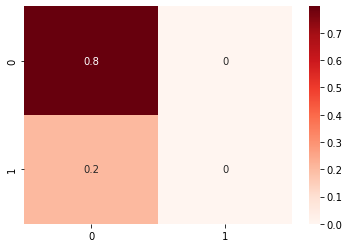

In [162]:
cf_matrix = confusion_matrix(y_test_cleaned, model.predict(X_test_cleaned))

print(classification_report(y_test_cleaned, model.predict(X_test_cleaned)))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap = "Reds")

## Decision Tree

In [163]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 1)
clf.fit(X_train_cleaned, y_train_cleaned)

accuracy_score(y_test_cleaned, clf.predict(X_test_cleaned))

0.7975

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



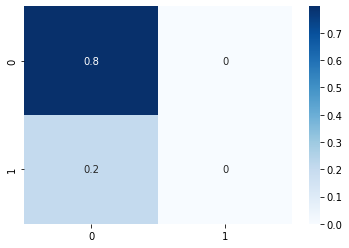

In [164]:
cf_matrix_dt = confusion_matrix(y_test_cleaned, clf.predict(X_test_cleaned))

sns.heatmap(cf_matrix_dt/np.sum(cf_matrix_dt), annot=True, cmap = "Blues")
print(classification_report(y_test_cleaned, clf.predict(X_test_cleaned)))

## SVC

In [165]:
svm = SVC()
svm.fit(X_train_cleaned, y_train_cleaned)

accuracy_score(y_test_cleaned, svm.predict(X_test_cleaned))

0.7975